# EDA (Exploratory Data Analysis)
> Now as we have cleaned our data according to our needs. We will move towards EDA to get useful insights from our data for further use 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df=pd.read_csv("cleaned_data.csv")

In [9]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(397924, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397924 non-null  int64  
 1   StockCode      397924 non-null  object 
 2   Description    397924 non-null  object 
 3   Quantity       397924 non-null  int64  
 4   InvoiceDate    397924 non-null  object 
 5   UnitPrice      397924 non-null  float64
 6   CustomerID     397924 non-null  float64
 7   Country        397924 non-null  object 
 8   TotalPurchase  397924 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.3+ MB
None
           InvoiceNo       Quantity      UnitPrice     CustomerID  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean   560617.126645      13.021823       3.116174   15294.315171   
std     13106.167695     180.420210      22.096788    1713.169877   
min    536365.000000       1.000000    

## Univariate Analysis (Single Variables)
* Unit Price
* Quantity
* Total Purchase

(array([3.97817e+05, 5.60000e+01, 9.00000e+00, 1.30000e+01, 3.00000e+00,
        5.00000e+00, 1.00000e+00, 4.00000e+00, 0.00000e+00, 3.00000e+00,
        2.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.   ,  162.855,  325.71 ,  488.565,  651.42 ,  814.275,
         977.13 , 1139.985, 1302.84 , 1465.695, 1628.55 , 1791.405,
        1954.26 , 2117.115, 2279.97 , 2442.825, 2605.68 , 2768.535,
        2931.39 , 3094.245, 3257.1  , 3419.955, 3582.81 , 3745.6

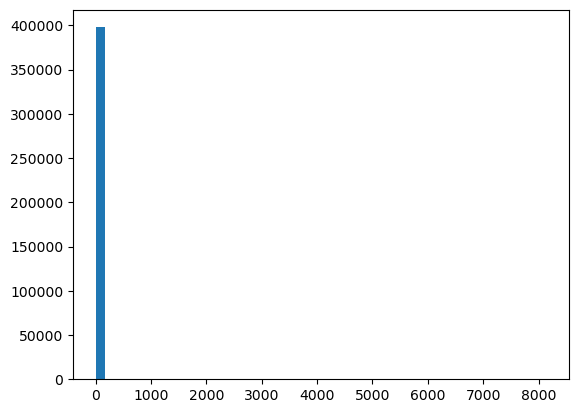

In [13]:
plt.hist(df["UnitPrice"],bins=50)

> As it is showing a strange plot It means our UnitPrice column has large outliers our the data is screwed, We will try two ways
* Using Log to hanlde skewness
* Using boxplot to find outliers 


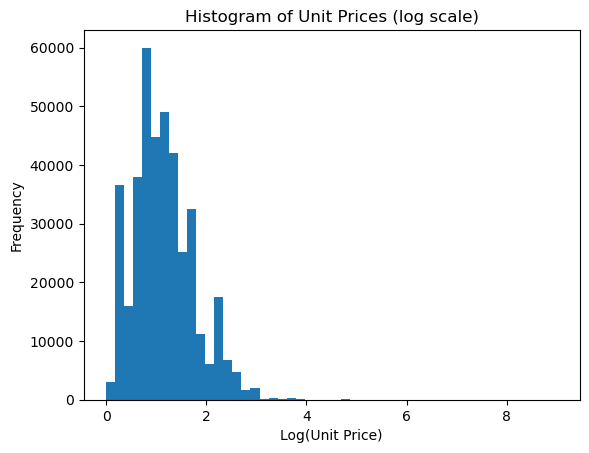

In [17]:
# At first we will use log 
plt.hist(np.log1p(df["UnitPrice"]), bins=50)
plt.xlabel("Log(Unit Price)")
plt.ylabel("Frequency")
plt.title("Histogram of Unit Prices (log scale)")
plt.show()

<Axes: ylabel='UnitPrice'>

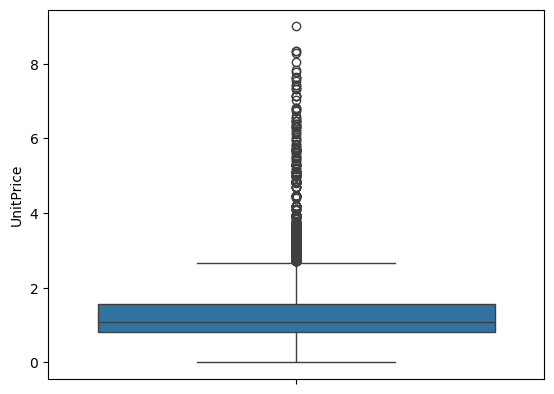

In [25]:
#Now we will use boxplot to find outliers
sns.boxplot(np.log1p(df["UnitPrice"]))

In [27]:
df["UnitPrice"].describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [37]:
df[df["UnitPrice"] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase
76240,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE,1687.17
76241,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE,1687.17
97061,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,2382.92
97063,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore,1252.95
97064,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore,2053.07
97588,548913,M,Manual,1,2011-04-05 09:45:00,1136.30,12669.0,France,1136.30
101491,549468,M,Manual,1,2011-04-08 14:27:00,1867.86,17940.0,United Kingdom,1867.86
118352,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
139314,554155,M,Manual,1,2011-05-23 11:26:00,1241.98,12757.0,Portugal,1241.98
139991,554301,M,Manual,1,2011-05-23 14:46:00,1241.98,12757.0,Portugal,1241.98


In [41]:
df = df[df["UnitPrice"] <= 1000]


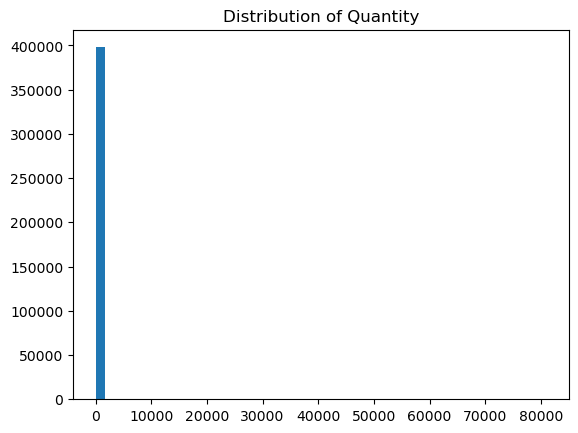

In [43]:
plt.hist(df['Quantity'], bins=50)
plt.title("Distribution of Quantity")
plt.show()

> Similar problem occured with Quantity also therefore will use log and check the outliers

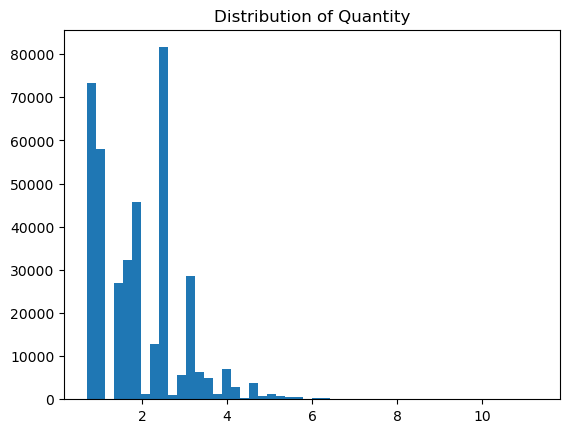

In [46]:
plt.hist(np.log1p(df['Quantity']), bins=50)
plt.title("Distribution of Quantity")
plt.show()

In [48]:
df["Quantity"].describe()

count    397903.000000
mean         13.022458
std         180.424950
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [50]:
df[df["Quantity"] > 500].head(20)   # adjust threshold
df[df["Quantity"] < 0].head(20)     # check returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase


In [56]:
df = df[df["Quantity"] > 0]


In [58]:
upper_limit = df["Quantity"].quantile(0.99)
df["Quantity"] = np.where(df["Quantity"] > upper_limit, upper_limit, df["Quantity"])

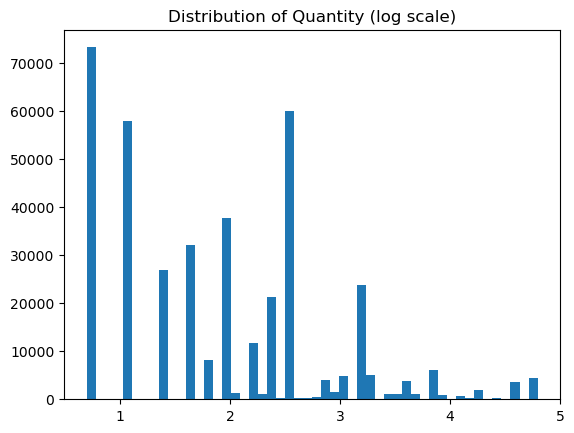

In [60]:
plt.hist(np.log1p(df["Quantity"]), bins=50)
plt.title("Distribution of Quantity (log scale)")
plt.show()


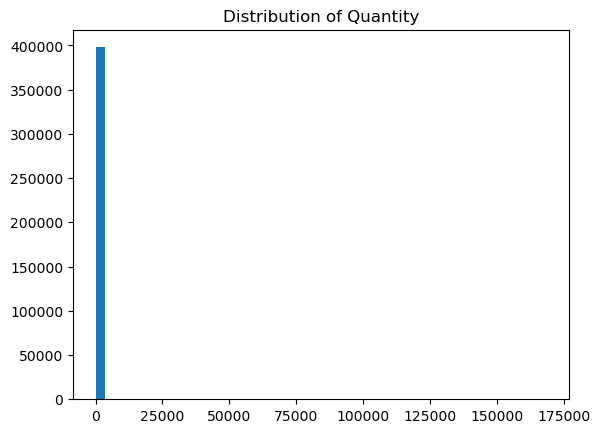

In [63]:
plt.hist(df["TotalPurchase"], bins=50)
plt.title("Distribution of Quantity")
plt.show()

>Here again we see the same problem

In [66]:
df["TotalPurchase"].describe()

count    397903.000000
mean         22.268588
std         308.360029
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalPurchase, dtype: float64

In [68]:
upper_limit = df["TotalPurchase"].quantile(0.99)
df["TotalPurchase"] = np.where(df["TotalPurchase"] > upper_limit, upper_limit, df["TotalPurchase"])

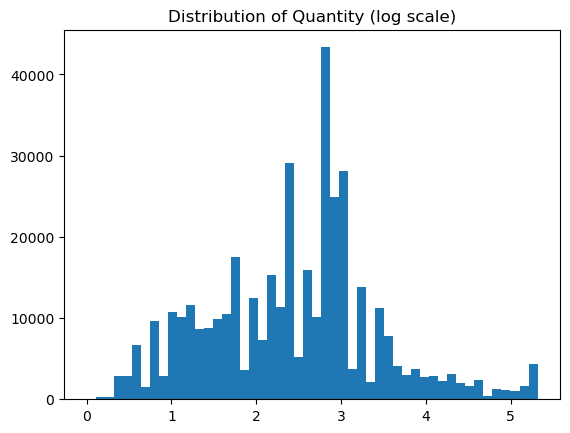

In [70]:
plt.hist(np.log1p(df["TotalPurchase"]), bins=50)
plt.title("Distribution of Quantity (log scale)")
plt.show()

## Time based Analysis

In [116]:

df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPurchase
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom,20.34


In [112]:
print(df["InvoiceDate"].dtype)

KeyError: 'InvoiceDate'

In [107]:
monthly_sales = df.set_index('InvoiceDate').resample('ME')['TotalPurchase'].sum()
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()

KeyError: "None of ['InvoiceDate'] are in the columns"

In [109]:
print("Available columns:")
print(df.columns.tolist())
print("\nColumn names with their exact formatting:")
for col in df.columns:
    print(f"'{col}'")

Available columns:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'TotalPurchase']

Column names with their exact formatting:
'InvoiceNo'
'StockCode'
'Description'
'Quantity'
'UnitPrice'
'CustomerID'
'Country'
'TotalPurchase'


In [118]:
df = df.reset_index()
print(df.columns.tolist()) 

['InvoiceDate', 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'TotalPurchase']


In [125]:
monthly_sales = df.set_index('InvoiceDate').resample('ME')['TotalPurchase'].sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [127]:
print("Index type:", type(df.index))
print("Index name:", df.index.name)
print("First few index values:", df.index[:5])

Index type: <class 'pandas.core.indexes.range.RangeIndex'>
Index name: None
First few index values: RangeIndex(start=0, stop=5, step=1)
